In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [60]:
# Read the CSV file
df1 = pd.read_csv('./metrics_baseline.csv')
df2 = pd.read_csv('./Prosody24_result.csv')

In [61]:
df2

,file,predicted
0,9c8d3a47-702c-427f-92a2-c625ea9b78d0/5/42063/1...,2
1,9c8d3a47-702c-427f-92a2-c625ea9b78d0/5/43059/1...,3
2,9c8d3a47-702c-427f-92a2-c625ea9b78d0/5/42080/1...,3
3,9c8d3a47-702c-427f-92a2-c625ea9b78d0/5/42047/1...,3
4,9c8d3a47-702c-427f-92a2-c625ea9b78d0/5/43010/1...,2
...,...,...
2058,039bc0f1-e28c-44a8-b2cf-3f8b68e38755/5/43059/1...,2
2059,039bc0f1-e28c-44a8-b2cf-3f8b68e38755/5/42080/1...,2
2060,039bc0f1-e28c-44a8-b2cf-3f8b68e38755/5/42047/1...,3
2061,039bc0f1-e28c-44a8-b2cf-3f8b68e38755/5/43010/1...,3


In [62]:
df2

,file,predicted
0,9c8d3a47-702c-427f-92a2-c625ea9b78d0/5/42063/1...,2
1,9c8d3a47-702c-427f-92a2-c625ea9b78d0/5/43059/1...,3
2,9c8d3a47-702c-427f-92a2-c625ea9b78d0/5/42080/1...,3
3,9c8d3a47-702c-427f-92a2-c625ea9b78d0/5/42047/1...,3
4,9c8d3a47-702c-427f-92a2-c625ea9b78d0/5/43010/1...,2
...,...,...
2058,039bc0f1-e28c-44a8-b2cf-3f8b68e38755/5/43059/1...,2
2059,039bc0f1-e28c-44a8-b2cf-3f8b68e38755/5/42080/1...,2
2060,039bc0f1-e28c-44a8-b2cf-3f8b68e38755/5/42047/1...,3
2061,039bc0f1-e28c-44a8-b2cf-3f8b68e38755/5/43010/1...,3


In [63]:
# File key in df2 need to seperate by / and infomation is user_uuid,form_id, passage_id, (ignore the last column which is timpstamp.tfs)

In [64]:
df2_split = df2['file'].str.split('/', expand=True)
df2_split.drop(columns=[3], inplace=True)
df2_split.columns = ['user_uuid', 'form_id', 'passage_id']
df2 = pd.concat([df2, df2_split], axis=1)
df2.drop(columns=['file'], inplace=True)
#convert passage_id to int, form_id to int
df2['passage_id'] = df2['passage_id'].astype(int)
df2['form_id'] = df2['form_id'].astype(int)

In [65]:
df2

,predicted,user_uuid,form_id,passage_id
0,2,9c8d3a47-702c-427f-92a2-c625ea9b78d0,5,42063
1,3,9c8d3a47-702c-427f-92a2-c625ea9b78d0,5,43059
2,3,9c8d3a47-702c-427f-92a2-c625ea9b78d0,5,42080
3,3,9c8d3a47-702c-427f-92a2-c625ea9b78d0,5,42047
4,2,9c8d3a47-702c-427f-92a2-c625ea9b78d0,5,43010
...,...,...,...,...
2058,2,039bc0f1-e28c-44a8-b2cf-3f8b68e38755,5,43059
2059,2,039bc0f1-e28c-44a8-b2cf-3f8b68e38755,5,42080
2060,3,039bc0f1-e28c-44a8-b2cf-3f8b68e38755,5,42047
2061,3,039bc0f1-e28c-44a8-b2cf-3f8b68e38755,5,43010


In [66]:
# Merge the two dataframes based on the user_uuid, form_id, and passage_id
df = pd.merge(df1, df2, on=['user_uuid', 'form_id', 'passage_id'], how='outer')
# fill all NaN values in the predicted column with 0 since it means that the user did not speak anything meaningfully.
df.fillna(0, inplace=True)

In [67]:
# rename predicted to predicted_prosody
df.rename(columns={'predicted': 'predicted_prosody'}, inplace=True)

In [68]:
# using a logical condition if that colunm correctly_spoken_words is less than 10 then set adjust_prosody to 0 else keep original in predicted_prosody_colunm
df['adjust_prosody'] = df.apply(lambda x: 0 if x['correctly_spoken_words'] < 10 else x['predicted_prosody'], axis=1)

In [69]:
df.to_csv('metrics_baseline_prosody.csv', index=False)

In [94]:
# Analysis corelation between wcpm and adjust_prosody if adjust_prosody not equal 0 and keep only correct_spoken_words > 15
df_adjust_prosody = df[(df['adjust_prosody'] != 0) & (df['correct_rate'] > 0.5)]

<Axes: xlabel='wcpm', ylabel='adjust_prosody'>

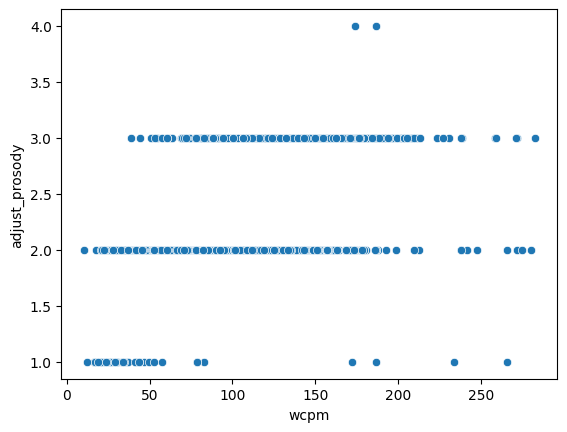

In [95]:
# plot relationship between wcpm and adjust_prosody
sns.scatterplot(data=df_adjust_prosody, x='wcpm', y='adjust_prosody')

In [103]:
# Test wcpm is normal distribution or not
stats.normaltest(df_adjust_prosody['wcpm'])

NormaltestResult(statistic=56.12325894635666, pvalue=6.501134731513212e-13)

In [111]:
# Using Spearman correlation
spearman_corr = stats.spearmanr(df_adjust_prosody['wcpm'], df_adjust_prosody['adjust_prosody'])

In [112]:
spearman_corr

SignificanceResult(statistic=0.6106877139256286, pvalue=1.8653660522765928e-177)